<a href="https://colab.research.google.com/github/plaban1981/Huggingface_transformers_course/blob/main/Hugging_transformer_Tokenize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

     |████████████████████████████████| 2.6 MB 15.3 MB/s 
     |████████████████████████████████| 636 kB 64.0 MB/s 
     |████████████████████████████████| 3.3 MB 52.0 MB/s 
     |████████████████████████████████| 895 kB 53.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Tokenizers

* Tokenizers are one of the core components of the NLP pipeline. 
* They serve one purpose: 
    * to translate text into data that can be processed by the model. 
    * Models can only process numbers, so tokenizers need to convert our text inputs to numerical data. 
    * The goal is to find the most meaningful representation — that is, the one that makes the most sense to the model — and, if possible, the smallest representation.

## Word Based Tokenizer 


In [14]:
tokenized_text = "Jim Henson was a puppeteer".split()
print(tokenized_text)

['Jim', 'Henson', 'was', 'a', 'puppeteer']


* There are also variations of word tokenizers that have extra rules for punctuation.
* With this kind of tokenizer, we can end up with some pretty large “vocabularies,” 
* Each word gets assigned an ID, starting from 0 and going up to the size of the vocabulary. The model uses these IDs to identify each word.

**vocabulary is defined by the total number of independent tokens that we have in our corpus**

* The issue with word based tokenizers is that they will not be able to distinguish if two words are similar like "dog" and "dogs"

* Finally, we need a custom token to represent words that are not in our vocabulary. This is known as the “unknown” token, often represented as ”[UNK]” or ””. 
* It’s generally a bad sign if you see that the tokenizer is producing a lot of these tokens, as it wasn’t able to retrieve a sensible representation of a word and you’re losing information along the way.

## Solution to represent words not in vocabulary

One way to reduce the amount of unknown tokens is to go one level deeper, using a **character-based tokenizer**.

#### Character-based tokenizers split the text into characters, rather than words. 

This has two primary benefits:

* The vocabulary is much smaller.
* There are much fewer out-of-vocabulary (unknown) tokens, since every word can be built from characters.

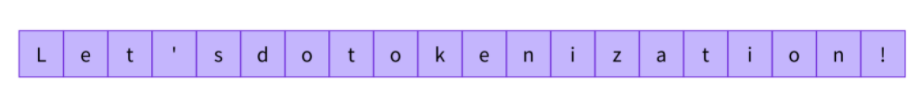

## Challenges with character based tokenization:

* Since the representation is now based on characters rather than words, intuitively, it’s less meaningful as each character doesn’t mean a lot on its own.

* Character based tokenens end up with a very large amount of tokens to be processed by our model whereas a word would only be a single token with a word-based tokenizer

#### To get the best of both worlds, we can use a third technique that combines the two approaches: subword tokenization.

## Subword Tokenization.

Subword tokenization algorithms rely on the principle that frequently used words should not be split into smaller subwords, but rare words should be decomposed into meaningful subwords.


For instance, “annoyingly” might be considered a rare word and could be decomposed into “annoying” and “ly”. 

* These are both likely to appear more frequently as standalone subwords, while at the same time the meaning of “annoyingly” is kept by the composite meaning of “annoying” and “ly”.

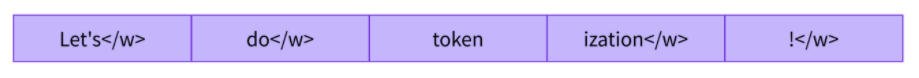

## Other tokenization techniques

* Byte-level BPE, as used in GPT-2
* WordPiece, as used in BERT
* SentencePiece or Unigram, as used in several multilingual models

## Loading and saving 

It is  based on the same two methods: 
* from_pretrained and 
* save_pretrained. 

These methods will load or save the algorithm used by the tokenizer (a bit like the architecture of the model) as well as its vocabulary (a bit like the weights of the model).

## BertTokenizer class

In [15]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")
tokenizer('this is a test')

{'input_ids': [101, 1142, 1110, 170, 2774, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}

## Using Base Model : AutoTokenizer

* Similar to AutoModel, the AutoTokenizer class will grab the proper tokenizer class in the library based on the checkpoint name, and can be used directly with any checkpoint

In [7]:
from transformers import pipeline
from transformers import AutoTokenizer

In [8]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [9]:
tokens = tokenizer("this is a test")

In [10]:
tokens

{'input_ids': [101, 2023, 2003, 1037, 3231, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}

## Saving a tokenizer is identical to saving a model

In [16]:
tokenizer.save_pretrained("/content")

('/content/tokenizer_config.json',
 '/content/special_tokens_map.json',
 '/content/vocab.txt',
 '/content/added_tokens.json')

## Using feature-extraction pipeline :

This pipeline extracts the hidden states from the base
transformer, which can be used as features in downstream tasks.

In [12]:
feature_extractor = pipeline("feature-extraction", model="distilbert-base-uncased", tokenizer="distilbert-base-uncased")
feature_extractor.tokenizer("this is a test")

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'input_ids': [101, 2023, 2003, 1037, 3231, 102], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [13]:
feature_extractor("this is a test")

[[[-0.156513050198555,
   -0.18619652092456818,
   0.05277661979198456,
   -0.10634393990039825,
   -0.013163101859390736,
   -0.2694379389286041,
   0.0922703668475151,
   0.15865272283554077,
   -0.0986747071146965,
   -0.2957231104373932,
   -0.13787859678268433,
   -0.038061052560806274,
   -0.0536169670522213,
   0.13045184314250946,
   0.039712660014629364,
   0.08689342439174652,
   0.025087296962738037,
   0.008617673069238663,
   0.25242576003074646,
   -0.1367814540863037,
   -0.12137328833341599,
   -0.1389578878879547,
   -0.13426464796066284,
   -0.09084445983171463,
   0.030509117990732193,
   -0.03861941397190094,
   0.11485480517148972,
   -0.05799652636051178,
   0.1013106182217598,
   0.09791972488164902,
   0.003874258603900671,
   0.11950479447841644,
   -0.06633919477462769,
   -0.02125721611082554,
   0.13090363144874573,
   0.026520051062107086,
   0.23624394834041595,
   0.05021986365318298,
   0.013503013178706169,
   -0.021379541605710983,
   -0.08832272142171

## Encoding :

* Translating text to numbers is known as **encoding**. 
* Encoding is done in a two-step process:    
       * the tokenization,  
       * conversion to input IDs.

## Tokenization
The tokenization process is done by the tokenize method of the tokenizer

In [2]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

sequence = "Using a Transformer network is simple"
tokens = tokenizer.tokenize(sequence)

print(tokens)


['Using', 'a', 'Trans', '##former', 'network', 'is', 'simple']


* This tokenizer is a **subword tokenizer** - it splits the words until it obtains tokens that can be represented by its vocabulary.
* Here the word  transformer is split into two tokens: **Trans** and **'##former**.

## From tokens to input IDs
The conversion to input IDs is handled by the **convert_tokens_to_ids** tokenizer method:

In [19]:
input_IDs = tokenizer.convert_tokens_to_ids(tokens)

In [20]:
input_IDs

[7993, 170, 13809, 23763, 2443, 1110, 3014]

In [21]:
tokens_ = tokenizer.convert_ids_to_tokens(input_IDs)
tokens_ 

['Using', 'a', 'Trans', '##former', 'network', 'is', 'simple']

In [23]:
print(" ".join(tokens_))

Using a Trans ##former network is simple


## Decoding 
Here from vocabulary indices, we want to get a string. This can be done with the decode method as follows:

In [22]:
decoded_string = tokenizer.decode(input_IDs)
print(decoded_string)

Using a Transformer network is simple


* Decode method not only converts the indices back to tokens but  also groups together the tokens that were part of the same words to produce a readable sentence.

* This behavior will be extremely useful when we use models that predict new text (either text generated from a prompt, or for sequence-to-sequence problems like translation or summarization).

## Conclusion 

The atomic operations a tokenizer can handle: 

* tokenization, 
* conversion to IDs, and 
* converting IDs back to a string.

## Assignment :
Replicate the two last steps (tokenization and conversion to input IDs) on the input sentences we used in section 2 (“I’ve been waiting for a HuggingFace course my whole life.” and “I hate this so much!”). Check that you get the same input IDs we got earlier!

In [3]:
sentences = ["I’ve been waiting for a HuggingFace course my whole life.",
             "I hate this so much!"]
sent_tokens = tokenizer.tokenize(sentences)

## Converting Sentences to tokens

In [4]:
sent_tokens

['I',
 '’',
 've',
 'been',
 'waiting',
 'for',
 'a',
 'Hu',
 '##gging',
 '##F',
 '##ace',
 'course',
 'my',
 'whole',
 'life',
 '.',
 'I',
 'hate',
 'this',
 'so',
 'much',
 '!']

## Encoding : Converting tokens to numbers

In [5]:
Inputids = tokenizer.convert_tokens_to_ids(sent_tokens)
Inputids

[146,
 787,
 1396,
 1151,
 2613,
 1111,
 170,
 20164,
 10932,
 2271,
 7954,
 1736,
 1139,
 2006,
 1297,
 119,
 146,
 4819,
 1142,
 1177,
 1277,
 106]

## Decoding

In [6]:
sents = tokenizer.decode(Inputids)
sents

'I ’ ve been waiting for a HuggingFace course my whole life. I hate this so much!'

## Handling multiple sequences

* How do we handle multiple sequences?
* How do we handle multiple sequences of different lengths?
* Are vocabulary indices the only inputs that allow a model to work well?
* Is there such a thing as too long a sequence?

## Models expect a batch of inputs

In [7]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence = "I've been waiting for a HuggingFace course my whole life."

tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)
input_ids = torch.tensor(ids)

In [10]:
input_ids.shape,type(input_ids)

(torch.Size([14]), torch.Tensor)

In [9]:
model(input_ids)

IndexError: ignored

* The problem encountered above is that we sent a single sequence to the model, 
* whereas 🤗 Transformers models expect multiple sentences by default. 

Here if you look closely, you’ll see that it didn’t just convert the list of input IDs into a tensor, it added a dimension on top of it:

In [12]:
tokenized_inputs = tokenizer(sequence, return_tensors="pt")
print(tokenized_inputs["input_ids"])
print(tokenized_inputs["input_ids"].shape)

tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102]])
torch.Size([1, 16])


In [17]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence = "I've been waiting for a HuggingFace course my whole life."

tokens = tokenizer(sequence,return_tensors="pt")
input_ids = tokens["input_ids"]

In [18]:
input_ids

tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102]])

In [19]:
input_ids.shape

torch.Size([1, 16])

* Let’s try again and add a new dimension

In [20]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence = "I've been waiting for a HuggingFace course my whole life."

tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)
input_ids = torch.tensor([ids]) # add a new dimension, fed the inputids as a list
print("Input IDs:", input_ids)

output = model(input_ids)
print("Logits:", output.logits)

Input IDs: tensor([[ 1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,  2607,
          2026,  2878,  2166,  1012]])
Logits: tensor([[-2.7276,  2.8789]], grad_fn=<AddmmBackward>)


In [21]:
print(input_ids.shape)

torch.Size([1, 14])


## Batching 

It is the act of sending multiple sentences through the model, all at once. If you only have one sentence, you can just build a batch with a single sequence:

**batched_ids = [ids, ids]**

* This is a batch of two identical sequences!

* Batching allows the model to work when you feed it multiple sentences. 

* Using multiple sequences is just as simple as building a batch with a single sequence

* The problem arises when we are trying to batch together two (or more) sentences,  of different lengths

* To work around this problem, we usually pad the inputs.

## Padding the inputs


* The following list of lists cannot be converted to a tensor:

In [22]:
batched_ids = [
  [200, 200, 200],
  [200, 200]
]

In order to work around this, we’ll use padding to make our tensors have a rectangular shape. 

Padding makes sure all our sentences have the same length by adding a special word called the padding token to the sentences with fewer values. 

For example, if you have 10 sentences with 10 words and 1 sentence with 20 words, padding will ensure all the sentences have 20 words. In our example, the resulting tensor looks like this:

In [23]:
padding_id = 100

batched_ids = [
  [200, 200, 200],
  [200, 200, padding_id]
]

#### The padding token ID can be found in tokenizer.pad_token_id

In [24]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence1_ids = [[200, 200, 200]]
sequence2_ids = [[200, 200]]
batched_ids = [[200, 200, 200], [200, 200, tokenizer.pad_token_id]]

print(model(torch.tensor(sequence1_ids)).logits)
print(model(torch.tensor(sequence2_ids)).logits)
print(model(torch.tensor(batched_ids)).logits)

tensor([[ 1.5694, -1.3895]], grad_fn=<AddmmBackward>)
tensor([[ 0.5803, -0.4125]], grad_fn=<AddmmBackward>)
tensor([[ 1.5694, -1.3895],
        [ 1.3373, -1.2163]], grad_fn=<AddmmBackward>)


**Note** : There’s something wrong with the logits in our batched predictions: the second row should be the same as the logits for the second sentence, but we’ve got completely different values!

* The key feature of Transformer models is attention layers that contextualize each token
* In the above the transformer has taken into consideration padding tokens

* In order to have the encoding same as that of individual sentences we need to tell the transformer(attention layers) to ignore the padding tokens
* This is acheived by **attention masks**

## Attention masks

Attention masks are tensors with the exact same shape as the input IDs tensor, filled with 0s and 1s

* 0s indicate  the corresponding tokens should not be attended to(ignore)
* 1s indicate the corresponding tokens should be attended to

In [25]:
tokenizer.pad_token_id

0

In [26]:
batched_ids = [
    [200, 200, 200],
    [200, 200, tokenizer.pad_token_id]
]

attention_mask = [
  [1, 1, 1],
  [1, 1, 0]
]

outputs = model(torch.tensor(batched_ids), attention_mask=torch.tensor(attention_mask))
print(outputs.logits)

tensor([[ 1.5694, -1.3895],
        [ 0.5803, -0.4125]], grad_fn=<AddmmBackward>)


## Longer sequences

* With Transformer models, there is a limit to the lengths of the sequences we can pass the models. 

* Most models handle sequences of up to 512 or 1024 tokens, and will crash when asked to process longer sequences.

There are two solutions to this problem:

    * Use a model with a longer supported sequence length.( Longformer,LED models)
    * Truncate your sequences by specifying the max_sequence_length parameter
    * sequence = sequence[:max_sequence_length]

## Putting it all together

*  tokenization, conversion to input IDs, padding, truncation, and attention masks.

The 🤗 Transformers API can handle all of the above for us with a high-level function

When  we call the tokenizer directly on the sentence, we get back inputs that are ready to pass through your model:

In [27]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

sequence = "I've been waiting for a HuggingFace course my whole life."

model_inputs = tokenizer(sequence)

In [28]:
model_inputs

{'input_ids': [101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [29]:
model_inputs['input_ids']

[101,
 1045,
 1005,
 2310,
 2042,
 3403,
 2005,
 1037,
 17662,
 12172,
 2607,
 2026,
 2878,
 2166,
 1012,
 102]

In [30]:
model_inputs['attention_mask']

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

* The AutoTokenizer  handles multiple sequences at a time, with no change in the API:

In [31]:
sequences = [
  "I've been waiting for a HuggingFace course my whole life.",
  "So have I!"
]

model_inputs = tokenizer(sequences)
model_inputs

{'input_ids': [[101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102], [101, 2061, 2031, 1045, 999, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]}

## Apply padding to senctence2 in the sequence as it if of no the same length

In [32]:
# Will pad the sequences up to the maximum sequence length
model_inputs = tokenizer(sequences, padding="longest")
model_inputs

{'input_ids': [[101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102], [101, 2061, 2031, 1045, 999, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}

In [33]:
model_inputs['attention_mask']

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]